In [1]:
import pandas as pd
df=pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012,1
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012,1
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012,1
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012,1
4,2012-01-07,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012,1
...,...,...,...,...,...,...,...,...,...
2914,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,2019,12
2915,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,2019,12
2916,2019-12-28,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,2019,12
2917,2019-12-29,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,2019,12


In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Features for dynamic trends
df['Yearly_Trend'] = df['Close'].rolling(window=365, min_periods=1).mean()
df['Monthly_Trend'] = df['Close'].rolling(window=30, min_periods=1).mean()
df['Weekly_Trend'] = df['Close'].rolling(window=7, min_periods=1).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']

df.dropna(inplace=True)


In [3]:
train_data = df.loc[:'2018-12-30']  # All data up to the end of 2018
test_data = df.loc['2019-01-01':]   # All data from the start of 2019
test_data


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Yearly_Trend,Monthly_Trend,Weekly_Trend,EMA_12,EMA_26,MACD
Date,,,,,,,,,,,,,,
2019-01-01,158.529999,159.360001,156.479996,157.740005,154.340271,35003500,2018,12,188.567014,162.806001,156.784284,156.651480,161.274446,-4.622966
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,37039700,2019,1,188.527726,161.909334,156.891427,156.846637,161.025968,-4.179332
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,91312200,2019,1,188.445425,160.759334,154.897143,154.591770,159.630712,-5.038942
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,58607100,2019,1,188.377562,159.811667,153.758571,153.617651,158.788436,-5.170786
2019-01-05,144.529999,148.550003,143.800003,148.259995,145.064575,58607100,2019,1,188.304302,158.929667,152.619999,152.793396,158.008552,-5.215156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,2019,12,206.291507,273.478997,282.967141,281.372756,276.079834,5.292922
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,2019,12,206.657671,274.210996,284.447139,282.669253,277.096142,5.573111
2019-12-28,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,2019,12,207.023616,274.942996,285.927137,283.766289,278.037167,5.729122


2025-02-19 16:35:32.811145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-19 16:35:32.828524: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-19 16:35:32.832238: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 16:35:32.841956: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1739963134.353243   497

Epoch 1/25


2025-02-19 16:35:36.738992: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0158
Epoch 2/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 3/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 4/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5341e-04
Epoch 5/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1991e-04
Epoch 6/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7462e-04
Epoch 7/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7237e-04
Epoch 8/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3071e-04
Epoch 9/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5718e-04
Epoch 10/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4918e-04
Epoch 11/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1965e-04
Epoch 12/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7827e-04
Epoch 13/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1454e-04
Epoch 14/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8818e-04
Epoch 15/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

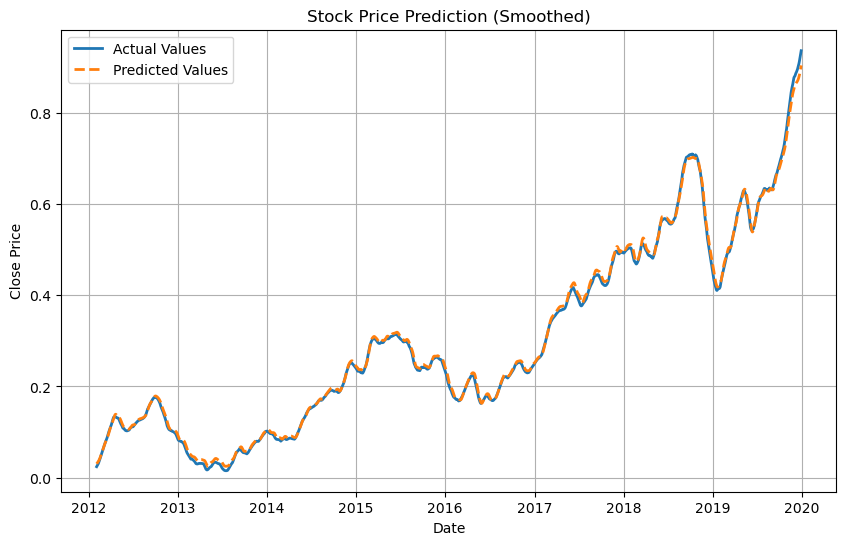

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from datetime import datetime


# Load dataset
df = pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)  # Remove invalid dates
df.set_index('Date', inplace=True)

# Normalize Close prices
scaler = MinMaxScaler()
df['Normalized_Close'] = scaler.fit_transform(df[['Close']])

# Apply rolling average to smooth data
df['Smoothed_Close'] = df['Normalized_Close'].rolling(window=30, min_periods=1).mean()

# Prepare data for LSTM
values = df['Smoothed_Close'].dropna().values.reshape(-1, 1)
scaled_values = scaler.fit_transform(values)  # Rescale after smoothing

# Create sequences for training
sequence_length = 30  # Reduce for finer patterns
X, y = [], []
for i in range(len(scaled_values) - sequence_length):
    X.append(scaled_values[i:i + sequence_length])
    y.append(scaled_values[i + sequence_length])

X, y = np.array(X), np.array(y)

# Define LSTM model
model_lstm = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X, y, epochs=25, batch_size=32, verbose=1)

# Make predictions
predictions = model_lstm.predict(X)
predicted_values_lstm= scaler.inverse_transform(predictions.reshape(-1, 1))
actual_values_lstm = scaler.inverse_transform(y.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y):], actual_values_lstm, label='Actual Values', linestyle='solid', linewidth=2)
plt.plot(df.index[-len(y):], predicted_values_lstm, label='Predicted Values', linestyle='dashed', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction (Smoothed)')
plt.legend()
plt.grid()
plt.show()



In [5]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define y_test (actual values) and y_pred (predicted values)
y_test = scaler.inverse_transform(y.reshape(-1, 1))  # Convert back to original scale
y_pred = predicted_values_lstm  # Already inverse transformed

# Evaluate LSTM model performance
def evaluate_lstm(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)  # R-squared
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    
    return {"R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}

# Run evaluation
metrics = evaluate_lstm(y_test, y_pred)


R² Score: 0.9989
MAE: 0.0053
MSE: 0.0000
RMSE: 0.0069
MAPE: 4.11%


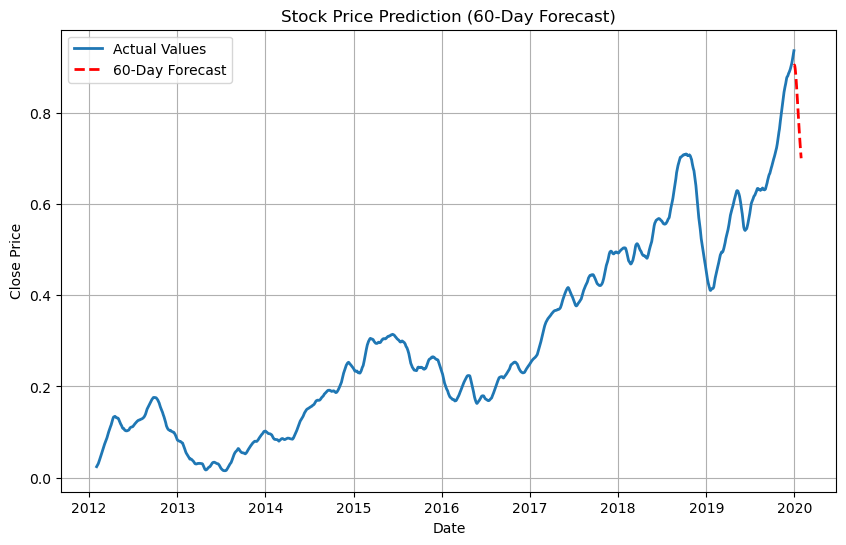

In [6]:
from datetime import timedelta

# Use the last sequence from training data
future_sequence = X[-1]  # Last sequence of 30 days
future_predictions = []

for _ in range(30):  # Predict next 60 days
    predicted_value = model_lstm.predict(future_sequence.reshape(1, sequence_length, 1), verbose=0)
    future_predictions.append(predicted_value[0, 0])

    # Update the sequence with the predicted value
    future_sequence = np.append(future_sequence[1:], predicted_value, axis=0)

# Inverse transform predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 31)]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y):], scaler.inverse_transform(y.reshape(-1, 1)), label='Actual Values', linestyle='solid', linewidth=2)
plt.plot(future_dates, future_predictions, label='60-Day Forecast', linestyle='dashed', linewidth=2, color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction (60-Day Forecast)')
plt.legend()
plt.grid()
plt.show()


Epoch 1/25


/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0276
Epoch 2/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 3/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 4/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 5/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 6/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1272e-04
Epoch 7/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3254e-04
Epoch 8/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6238e-04
Epoch 9/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2380e-04
Epoch 10/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4621e-04
Epoch 11/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9748e-04
Epoch 12/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8337e-04
Epoch 13/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5146e-04
Epoch 14/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9268e-04
Epoch 15/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5

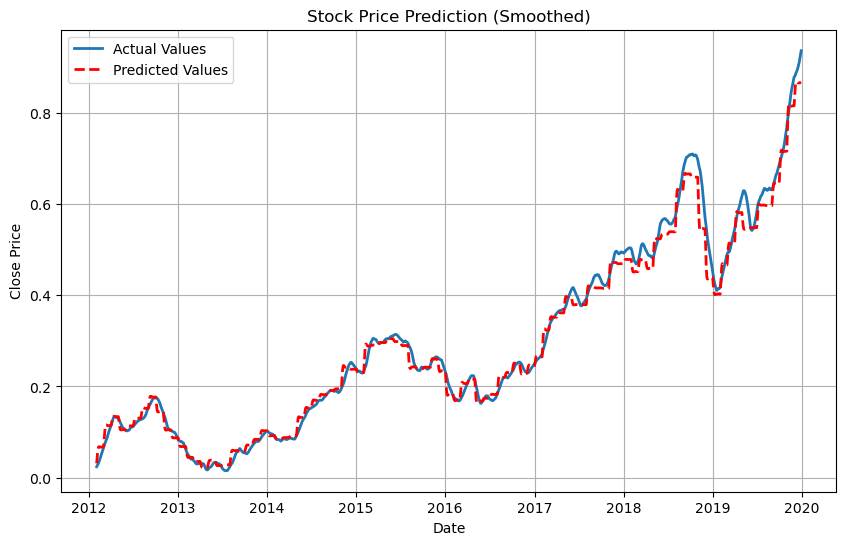

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from datetime import datetime, timedelta

# Load dataset
df = pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)  # Remove invalid dates
df.set_index('Date', inplace=True)

# Extract Year and Month for grouping
df['Year'] = df.index.year
df['Month'] = df.index.month

# Normalize Close prices
scaler = MinMaxScaler()
df['Normalized_Close'] = scaler.fit_transform(df[['Close']])

# Compute monthly averages
monthly_averages = {}
for month, group in df.groupby(['Year', 'Month']):
    monthly_data = group['Normalized_Close'].to_numpy()
    if len(monthly_data) > 0:
        monthly_averages[month] = np.nanmean(monthly_data)  # Compute average ignoring NaNs

# Assign the monthly average values back to the main DataFrame
df['Monthly_Avg_Normalized'] = df.apply(
    lambda row: monthly_averages.get((row['Year'], row['Month']), np.nan),
    axis=1
)

# Prepare data for LSTM
values = df['Monthly_Avg_Normalized'].dropna().values
values = values.reshape(-1, 1)

# Scale data
scaled_values = scaler.fit_transform(values)

# Create sequences for training
sequence_length = 30
X, y = [], []
for i in range(len(scaled_values) - sequence_length):
    X.append(scaled_values[i:i + sequence_length])
    y.append(scaled_values[i + sequence_length])

X, y = np.array(X), np.array(y)

# Define LSTM model
model_lstm2 = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

model_lstm2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm2.fit(X, y, epochs=25, batch_size=32, verbose=1)

# Make predictions
predictions = model_lstm2.predict(X)
predicted_values_lstm2 = scaler.inverse_transform(predictions.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y):], actual_values_lstm, label='Actual Values', linestyle='solid', linewidth=2)
plt.plot(df.index[-len(y):], predicted_values_lstm2, label='Predicted Values', linestyle='dashed', linewidth=2, color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction (Smoothed)')
plt.legend()
plt.grid()
plt.show()

Epoch 1/20


/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0296
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010    
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6979e-04
Epoch 13/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7419e-04
Epoch 14/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1303e-04
Epoch 15/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3439e-04
Epoch 16/2

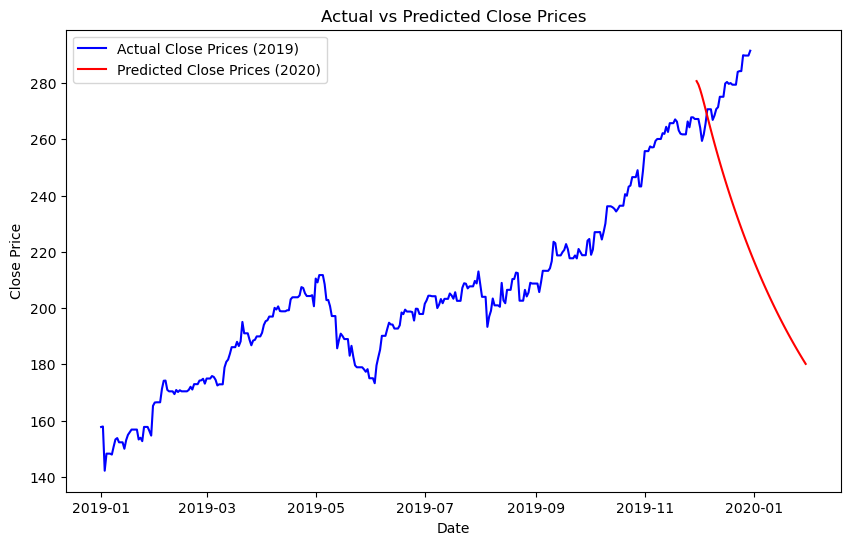

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from datetime import datetime, timedelta

# Load dataset
df = pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows with invalid dates
df = df.dropna(subset=['Date'])

# Set Date column as the index
df.set_index('Date', inplace=True)

# Extract Year and Month for grouping
df['Year'] = df.index.year
df['Month'] = df.index.month

# Normalize the Close prices
scaler = MinMaxScaler()
df['Normalized_Close'] = scaler.fit_transform(df[['Close']])

# Compute monthly averages
monthly_averages = {}
for month, group in df.groupby(['Year', 'Month']):
    monthly_data = group['Normalized_Close'].to_numpy()
    if len(monthly_data) > 0:
        monthly_averages[month] = np.nanmean(monthly_data)  # Compute average ignoring NaNs

# Assign the monthly average values back to the main DataFrame
df['Monthly_Avg_Normalized'] = df.apply(
    lambda row: monthly_averages.get((row['Year'], row['Month']), np.nan),
    axis=1
)

# Prepare data for LSTM
values = df['Monthly_Avg_Normalized'].dropna().values
values = values.reshape(-1, 1)

# Scale data
scaled_values = scaler.fit_transform(values)

# Create sequences for training
sequence_length = 60
X, y = [], []
for i in range(len(scaled_values) - sequence_length):
    X.append(scaled_values[i:i + sequence_length])
    y.append(scaled_values[i + sequence_length])
X, y = np.array(X), np.array(y)

# Define LSTM model
model_lstm2 = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

model_lstm2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm2.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Generate predictions only for the target range
start_date = datetime(2019, 11, 30)
end_date = datetime(2020, 1, 30)
target_dates = pd.date_range(start=start_date, end=end_date)

# Use the last available sequence before the target range to predict values
last_sequence = scaled_values[-sequence_length:]
predictions = []

for _ in target_dates:
    # Predict the next value
    predicted = model_lstm2.predict(last_sequence.reshape(1, sequence_length, 1), verbose=0)
    predictions.append(predicted[0, 0])

    # Update the sequence with the predicted value
    last_sequence = np.append(last_sequence[1:], predicted, axis=0)

# Rescale predictions and actual values to the original scale
scaler2 = MinMaxScaler()
scaler2.fit(df[['Close']])  # Fit on the original Close column
df['Reconstructed_Close'] = scaler2.inverse_transform(df[['Normalized_Close']])  # Reconstruct original Close values
predicted_values = scaler2.inverse_transform(np.array(predictions).reshape(-1, 1))  # Rescale predictions


# Filter the data to show reconstructed close prices only for 2019
start_filter_date = datetime(2019, 1, 1)
end_filter_date = datetime(2019, 12, 31)
filtered_actual_data = df.loc[start_filter_date:end_filter_date, 'Reconstructed_Close']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(filtered_actual_data.index, filtered_actual_data, label='Actual Close Prices (2019)', color='blue')
plt.plot(target_dates, predicted_values, label='Predicted Close Prices (2020)', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

ADF Statistic: -1.1964856439826308, p-value: 0.675105669066123
Data is not stationary. Applying differencing...


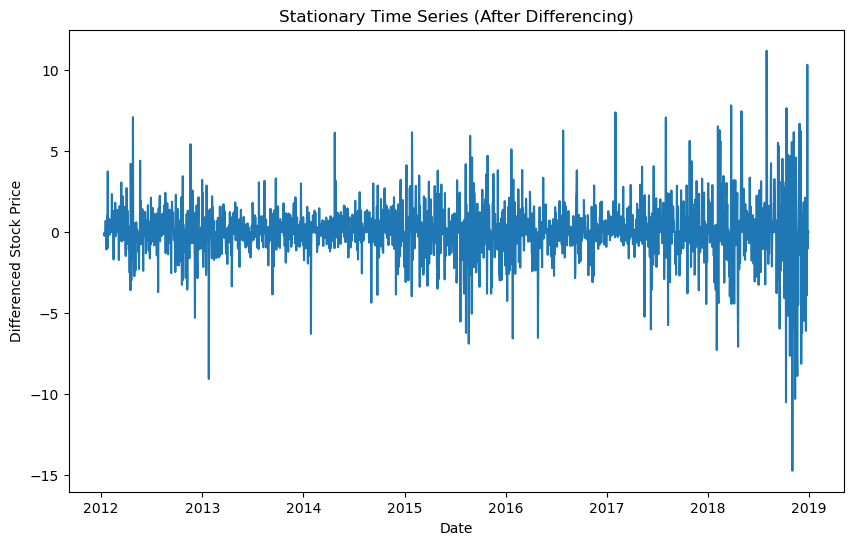

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Load data
df = pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature engineering
df['Yearly_Trend'] = df['Close'].rolling(window=365, min_periods=1).mean()
df['Monthly_Trend'] = df['Close'].rolling(window=30, min_periods=1).mean()
df['Weekly_Trend'] = df['Close'].rolling(window=7, min_periods=1).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']

# Lag features
for lag in range(1, 8):  # Lags from 1 to 7 days
    df[f'lag_{lag}'] = df['Close'].shift(lag)

# Drop NaN values
df.dropna(inplace=True)

# Define train and test sets
train_data = df.loc[:'2018-12-30']
test_data = df.loc['2019-01-01':]

features = ['Yearly_Trend', 'Monthly_Trend', 'Weekly_Trend', 'MACD'] + [f'lag_{lag}' for lag in range(1, 8)]
X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data['Close'], test_data['Close']

# Check for stationarity (ADF test)
result = adfuller(y_train)
print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

# If p-value > 0.05, the series is not stationary, so differencing is required
if result[1] > 0.05:
    print("Data is not stationary. Applying differencing...")
    y_train_diff = y_train.diff().dropna()  # Apply differencing
else:
    y_train_diff = y_train  # If already stationary, no differencing

# Plot the stationary time series (after differencing)
plt.figure(figsize=(10, 6))
plt.plot(y_train_diff)
plt.title('Stationary Time Series (After Differencing)')
plt.xlabel('Date')
plt.ylabel('Differenced Stock Price')
plt.show()

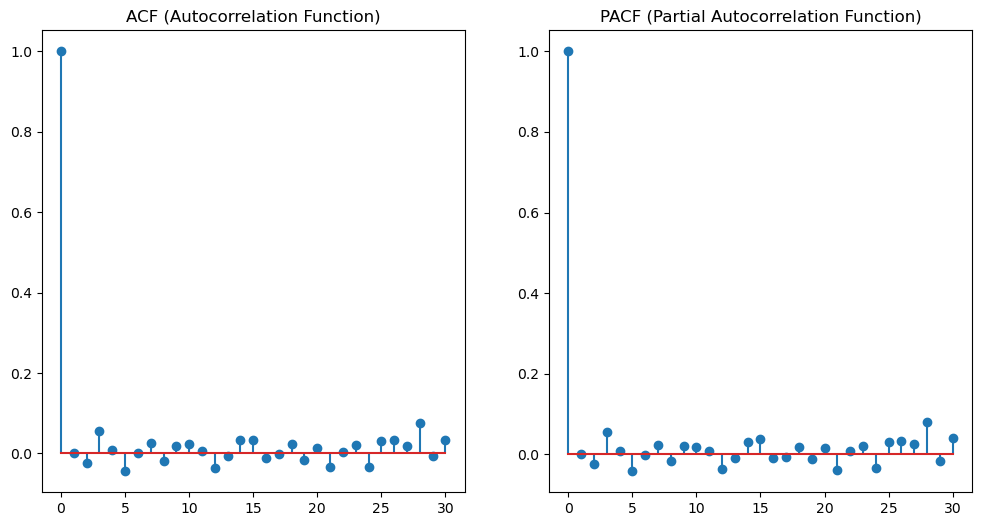

In [10]:

# ACF and PACF plots to find the best p, q
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.stem(acf(y_train_diff, nlags=30))
plt.title('ACF (Autocorrelation Function)')

plt.subplot(1, 2, 2)
plt.stem(pacf(y_train_diff, nlags=30))
plt.title('PACF (Partial Autocorrelation Function)')
plt.show()

/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/saswata/miniconda3/envs/myenv/lib/python

MAE (ARIMA): 52.16


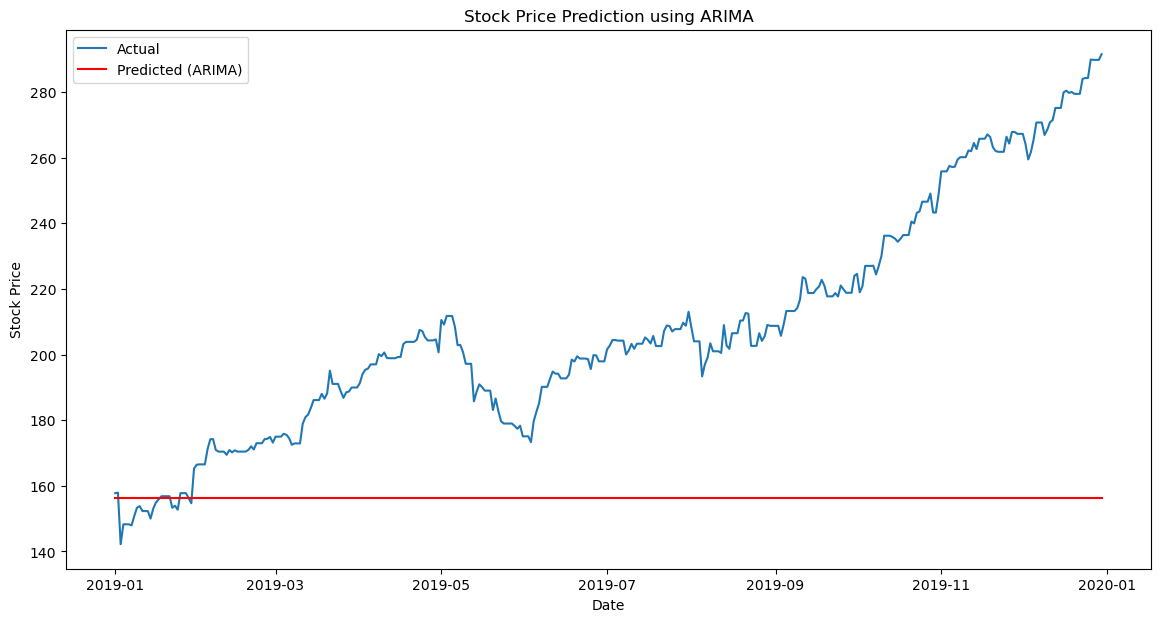

In [11]:
arima_model = ARIMA(y_train, order=(1, 1, 1))  # You can adjust these parameters after analyzing ACF/PACF
arima_result = arima_model.fit()

# Predict using ARIMA model
y_pred_arima = arima_result.forecast(steps=len(y_test))

# Calculate MAE for ARIMA
mae_arima = mean_absolute_error(y_test, y_pred_arima)
print(f'MAE (ARIMA): {mae_arima:.2f}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_arima, label='Predicted (ARIMA)', color='red')
plt.title('Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE (SARIMAX): 0.00


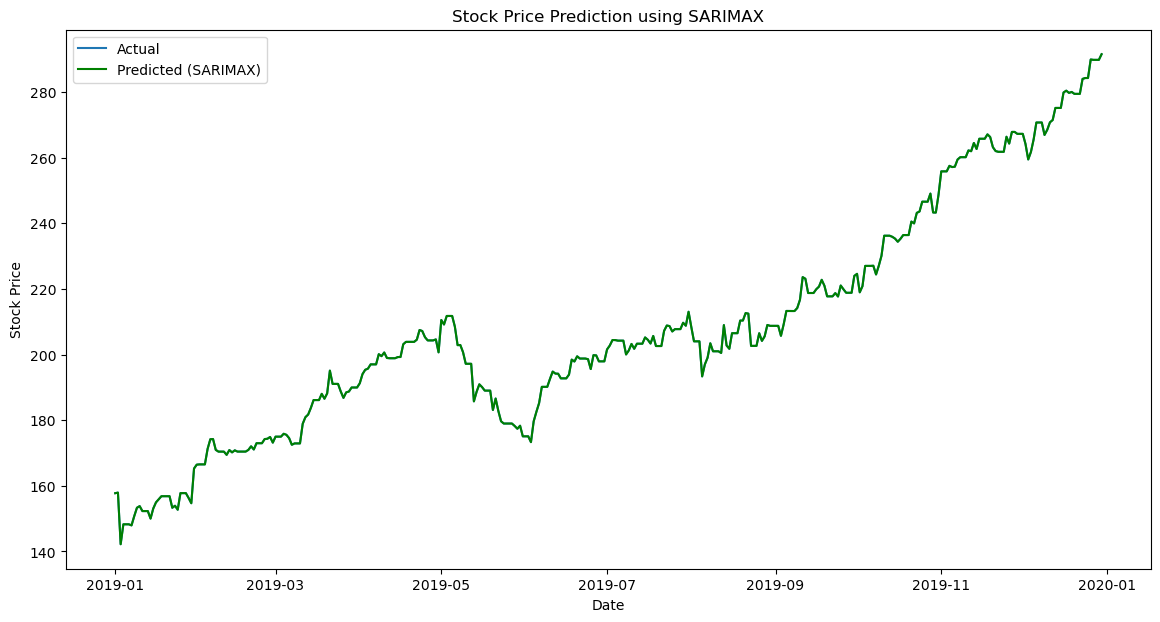

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
df = pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature engineering
df['Yearly_Trend'] = df['Close'].rolling(window=365, min_periods=1).mean()
df['Monthly_Trend'] = df['Close'].rolling(window=30, min_periods=1).mean()
df['Weekly_Trend'] = df['Close'].rolling(window=7, min_periods=1).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']

# Lag features
for lag in range(1, 8):  # Lags from 1 to 7 days
    df[f'lag_{lag}'] = df['Close'].shift(lag)

# Drop NaN values
df.dropna(inplace=True)

# Define train and test sets
train_data = df.loc[:'2018-12-30']
test_data = df.loc['2019-01-01':]

features = ['Yearly_Trend', 'Monthly_Trend', 'Weekly_Trend', 'MACD'] + [f'lag_{lag}' for lag in range(1, 8)]
X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data['Close'], test_data['Close']

# Fit the SARIMAX model
# For simplicity, we choose an initial order for the SARIMAX (you can tune these hyperparameters)
sarimax_model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))  # Example seasonal order
sarimax_result = sarimax_model.fit(disp=False)

# Predict using the SARIMAX model
y_pred_sarimax = sarimax_result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Calculate MAE
mae_sarimax = mean_absolute_error(y_test, y_pred_sarimax)
print(f'MAE (SARIMAX): {mae_sarimax:.2f}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_sarimax, label='Predicted (SARIMAX)', color='green')
plt.title('Stock Price Prediction using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2547, number of used features: 11
[LightGBM] [Info] Start training from score 115.195405
MAE: 9.99


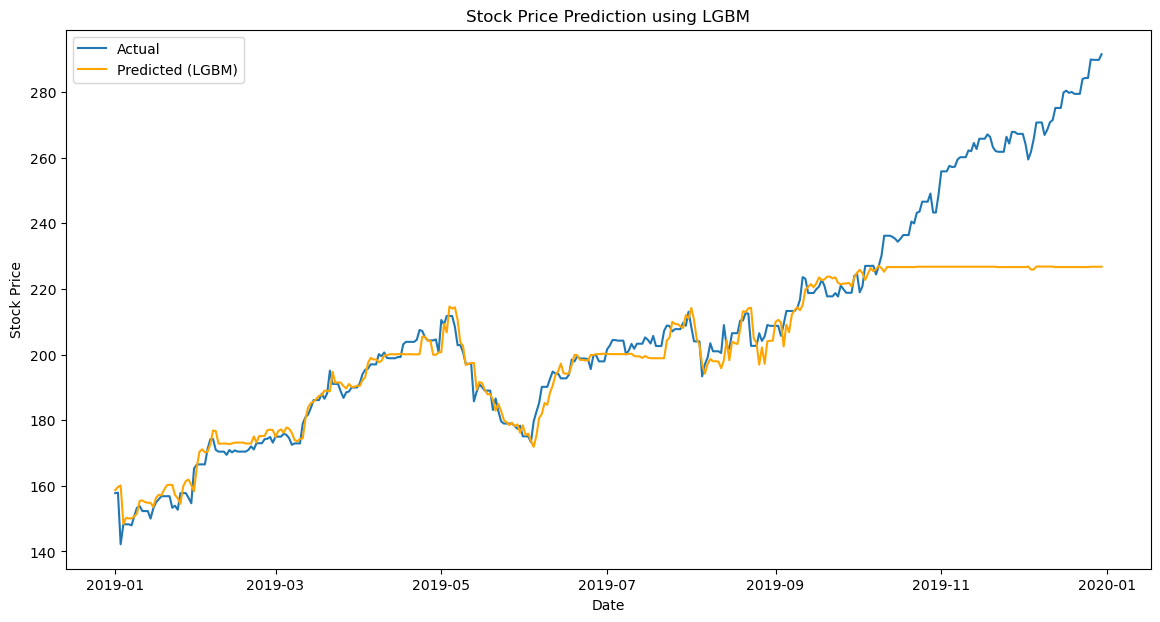

In [13]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load data
df = pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature engineering
df['Yearly_Trend'] = df['Close'].rolling(window=365, min_periods=1).mean()
df['Monthly_Trend'] = df['Close'].rolling(window=30, min_periods=1).mean()
df['Weekly_Trend'] = df['Close'].rolling(window=7, min_periods=1).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']

# Lag features
for lag in range(1, 8):  # Lags from 1 to 7 days
    df[f'lag_{lag}'] = df['Close'].shift(lag)

# Drop NaN values
df.dropna(inplace=True)

# Define train and test sets
train_data = df.loc[:'2018-12-30']
test_data = df.loc['2019-01-01':]

features = ['Yearly_Trend', 'Monthly_Trend', 'Weekly_Trend', 'MACD'] + [f'lag_{lag}' for lag in range(1, 8)]
X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data['Close'], test_data['Close']

# Train LightGBM model
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
# Train LightGBM model using sklearn API
model = lgb.LGBMRegressor(objective='regression', metric='mae', boosting_type='gbdt', n_estimators=100)

# Fit the model with early stopping
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Predict
y_pred_lgbm = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lgbm)
print(f'MAE: {mae:.2f}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_lgbm, label='Predicted (LGBM)', color='orange')
plt.title('Stock Price Prediction using LGBM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Decision Tree MAE: 9.95


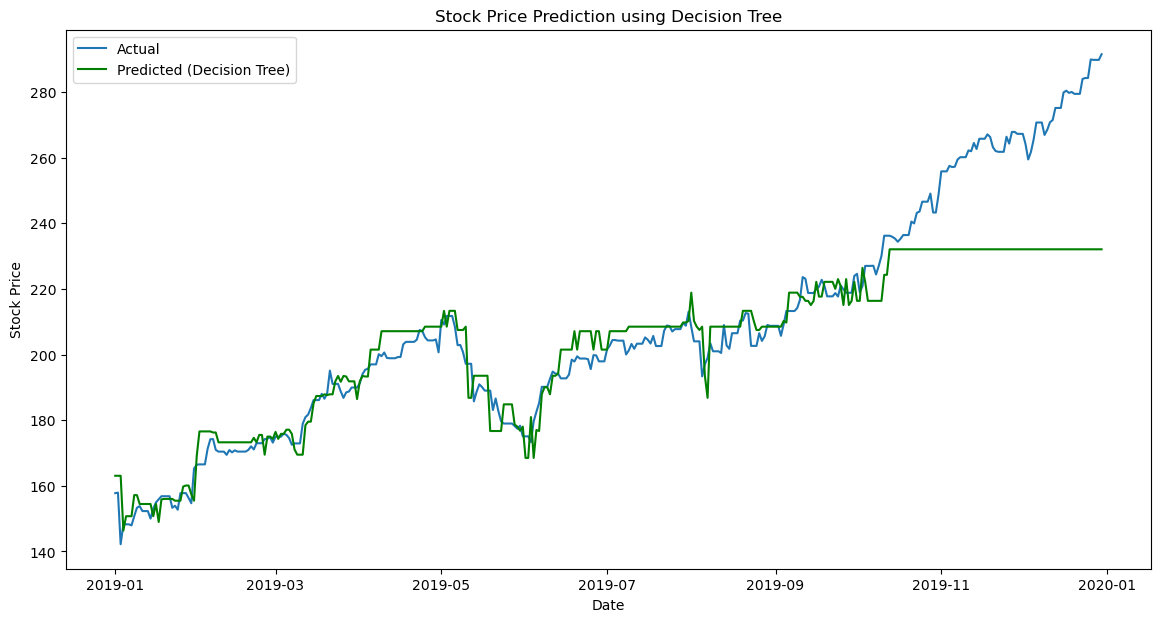

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_dt = dt_model.predict(X_test)

# MAE Calculation
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f'Decision Tree MAE: {mae_dt:.2f}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_dt, label='Predicted (Decision Tree)', color='green')
plt.title('Stock Price Prediction using Decision Tree')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


XGBoost MAE: 12.17


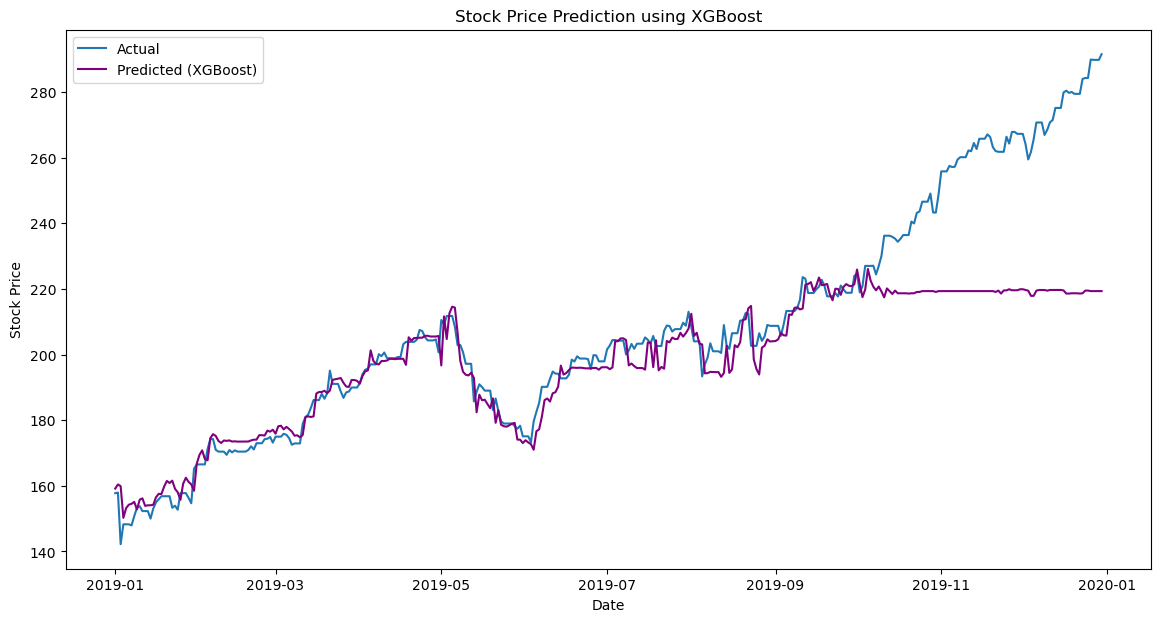

In [15]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_xgb = xgb_model.predict(X_test)

# MAE Calculation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'XGBoost MAE: {mae_xgb:.2f}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_xgb, label='Predicted (XGBoost)', color='purple')
plt.title('Stock Price Prediction using XGBoost')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Random Forest MAE: 10.13


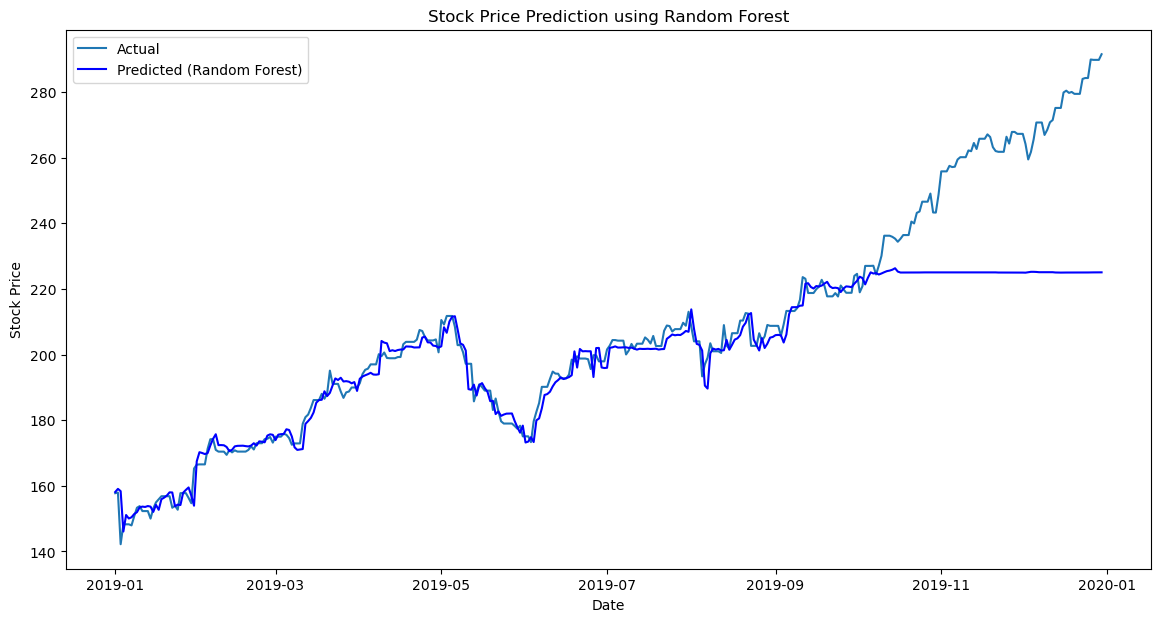

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_rf = rf_model.predict(X_test)

# MAE Calculation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest MAE: {mae_rf:.2f}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Predicted (Random Forest)', color='blue')
plt.title('Stock Price Prediction using Random Forest')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


/home/saswata/miniconda3/envs/myenv2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:33:15 - cmdstanpy - INFO - Chain [1] start processing
16:33:16 - cmdstanpy - INFO - Chain [1] done processing


MAE: 27.18


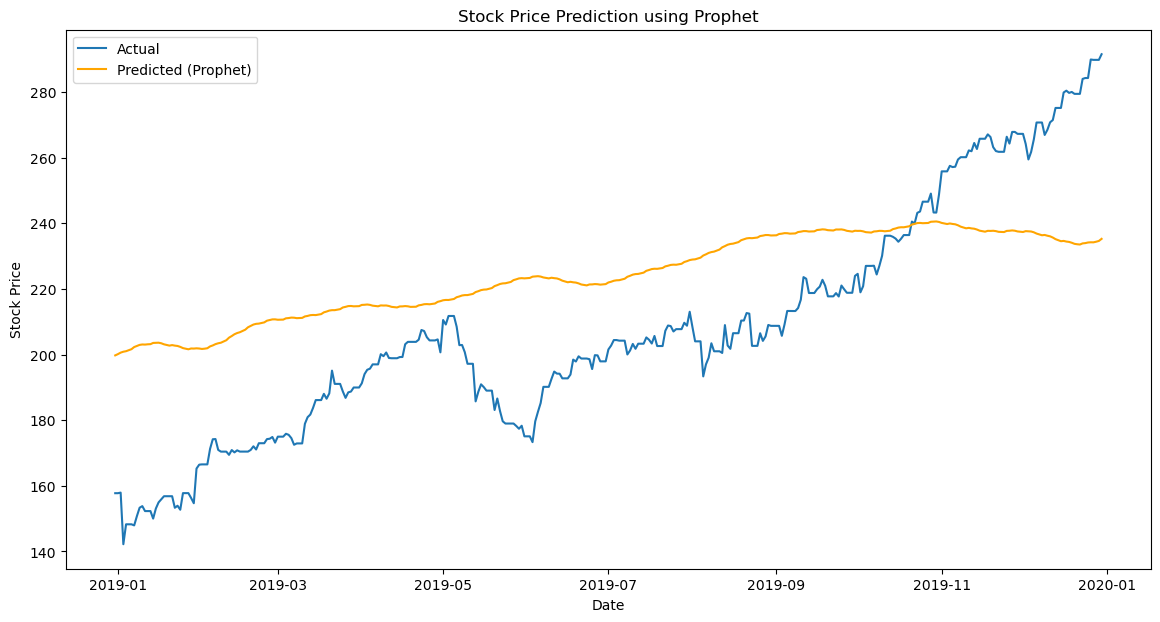

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Load data
df = pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Prepare data for Prophet
df_prophet = df[['Close']].reset_index()
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Split data into train and test
train_data = df_prophet[df_prophet['ds'] <= '2018-12-30']
test_data = df_prophet[df_prophet['ds'] > '2018-12-30']

# Initialize and fit Prophet model
model_proph = Prophet()
model_proph.fit(train_data)

# Create future dataframe
future = model_proph.make_future_dataframe(periods=len(test_data), freq='D')

# Predict
y_pred = model_proph.predict(future)

# Extract relevant predictions
forecast = y_pred[['ds', 'yhat']]
forecast.set_index('ds', inplace=True)

y_test = test_data.set_index('ds')['y']
y_pred_prophet = forecast.loc[test_data['ds'], 'yhat']

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_prophet)
print(f'MAE: {mae:.2f}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_prophet, label='Predicted (Prophet)', color='orange')
plt.title('Stock Price Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute residuals
residuals = y_test - y_pred_prophet
n_prophet = len(residuals)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred_prophet)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_prophet))
mape = np.mean(np.abs(residuals / y_test)) * 100
r2 = r2_score(y_test, y_pred_prophet)

# AIC and BIC calculations
sigma_squared = np.var(residuals)  # Variance of residuals
log_likelihood = -n_prophet / 2 * (np.log(2 * np.pi * sigma_squared) + 1)

# Approximate number of parameters in Prophet
k_prophet = 3  # Trend, seasonality, and holidays (if included)

aic = 2 * k_prophet - 2 * log_likelihood
bic = k_prophet * np.log(n_prophet) - 2 * log_likelihood

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R²: {r2:.4f}")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")


MAE: 27.1804
RMSE: 30.0414
MAPE: 13.8816%
R²: 0.2482
AIC: 3400.7696
BIC: 3412.4693


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

n = len(y_test)
k = X_train.shape[1]

# LSTM predictions
predictions_lstm = {
    'model': ['lstm2', 'lstm'],
    'pred': [predicted_values_lstm2, predicted_values_lstm]
}

results = {}

for value, p in zip(predictions_lstm['model'], predictions_lstm['pred']):
    residuals = actual_values_lstm - p
    n_lstm = len(residuals)
    sigma_squared = np.var(residuals)  # Variance of residuals
    log_likelihood = -n_lstm / 2 * (np.log(2 * np.pi * sigma_squared) + 1)
    
    # Number of parameters in LSTM (approximate count)
    model_obj = globals()[f"model_{value}"]
    k_lstm = sum([np.prod(v.shape) for v in model_obj.trainable_variables])

    # Metrics
    results[f"mae_{value}"] = mean_absolute_error(actual_values_lstm, p)
    results[f"rmse_{value}"] = np.sqrt(mean_squared_error(actual_values_lstm, p))
    results[f"mape_{value}"] = np.mean(np.abs(residuals / actual_values_lstm)) * 100
    
    ss_total = np.sum((actual_values_lstm - np.mean(actual_values_lstm))**2)
    ss_residual = np.sum(residuals**2)
    results[f"r2_{value}"] = 1 - (ss_residual / ss_total)
    
    # AIC and BIC
    results[f"aic_{value}"] = 2 * k_lstm - 2 * log_likelihood
    results[f"bic_{value}"] = k_lstm * np.log(n_lstm) - 2 * log_likelihood

# Other model predictions
predictions_model = {
    'Model': ['arima', 'sarimax', 'lgbm', 'dt', 'xgb', 'rf'],
    'pred': [y_pred_arima, y_pred_sarimax, y_pred_lgbm, y_pred_dt, y_pred_xgb, y_pred_rf]
}

for value, p in zip(predictions_model['Model'], predictions_model['pred']):
    mse = mean_squared_error(y_test, p)
    
    results[f"mae_{value}"] = mean_absolute_error(y_test, p)
    results[f"rmse_{value}"] = np.sqrt(mse)
    results[f"mape_{value}"] = np.mean(np.abs((y_test - p) / y_test)) * 100
    results[f"r2_{value}"] = r2_score(y_test, p)
    
    # AIC and BIC
    results[f"aic_{value}"] = n * np.log(mse) + 2 * k
    results[f"bic_{value}"] = n * np.log(mse) + k * np.log(n)

# Print results
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

mae_lstm2: 0.0143
rmse_lstm2: 0.0216
mape_lstm2: 7.3293
r2_lstm2: 0.9894
aic_lstm2: 127873.2456
bic_lstm2: 551952.9123
mae_lstm: 0.0053
rmse_lstm: 0.0069
mape_lstm: 4.1142
r2_lstm: 0.9989
aic_lstm: 123465.1870
bic_lstm: 555005.6858
mae_arima: 52.1636
rmse_arima: 62.1798
mape_arima: 23.0980
r2_arima: -2.2306
aic_arima: 3028.6614
bic_arima: 3071.5301
mae_sarimax: 0.0001
rmse_sarimax: 0.0002
mape_sarimax: 0.8082
r2_sarimax: 1.0000
aic_sarimax: -6360.5619
bic_sarimax: -6317.6933
mae_lgbm: 9.9921
rmse_lgbm: 18.4408
mape_lgbm: 4.0514
r2_lgbm: 0.7159
aic_lgbm: 2143.8022
bic_lgbm: 2186.6709
mae_dt: 9.9543
rmse_dt: 16.5566
mape_dt: 4.1893
r2_dt: 0.7710
aic_dt: 2065.3395
bic_dt: 2108.2082
mae_xgb: 12.1735
rmse_xgb: 21.7702
mape_xgb: 4.9621
r2_xgb: 0.6040
aic_xgb: 2264.6345
bic_xgb: 2307.5032
mae_rf: 10.1315
rmse_rf: 19.0908
mape_rf: 4.0694
r2_rf: 0.6955
aic_rf: 2169.0218
bic_rf: 2211.8905


In [21]:
mae_prophet = 27.1804
rmse_prophet = 30.0414
mape_prophet = 13.8816
r2_prophet = 0.2482
aic_prophet = 3400.7696
bic_prophet = 3412.4693

results.update({
    "mae_prophet": mae_prophet,
    "rmse_prophet": rmse_prophet,
    "mape_prophet": mape_prophet,
    "r2_prophet": r2_prophet,
    "aic_prophet": aic_prophet,
    "bic_prophet": bic_prophet
})

In [22]:
prophet_row = {
    "Model": "prophet",
    "MAE": results.get("mae_prophet", None),
    "RMSE": results.get("rmse_prophet", None),
    "MAPE": results.get("mape_prophet", None),
    "R2": results.get("r2_prophet", None),
    "AIC": results.get("aic_prophet", None),
    "BIC": results.get("bic_prophet", None)
}

In [25]:
import pandas as pd

# Extract model names
models = ['lstm2', 'lstm', 'arima', 'sarimax', 'lgbm', 'dt', 'xgb', 'rf', 'prophet']

# Define metric names
metrics = ["mae", "rmse", "mape", "r2", "aic", "bic"]

# Prepare data
data = []
for model in models:
    row = {"Model": model}
    for metric in metrics:
        row[metric.upper()] = results.get(f"{metric}_{model}", None)  # Fetch metric values
    data.append(row)

# Create DataFrame
df_results = pd.DataFrame(data)

# Print DataFrame
df_results

,Model,MAE,RMSE,MAPE,R2,AIC,BIC
0,lstm2,0.014347,0.021550,7.329301,0.989351,127873.245615,551952.912299
1,lstm,0.005282,0.006939,4.114195,0.998896,123465.187014,555005.685823
2,arima,52.163630,62.179754,23.098014,-2.230613,3028.661442,3071.530135
3,sarimax,0.000132,0.000156,0.808178,1.000000,-6360.561946,-6317.693254
4,lgbm,9.992064,18.440761,4.051435,0.715852,2143.802227,2186.670919
5,dt,9.954285,16.556603,4.189311,0.770950,2065.339493,2108.208186
6,xgb,12.173516,21.770197,4.962120,0.603985,2264.634512,2307.503205
7,rf,10.131516,19.090786,4.069403,0.695467,2169.021844,2211.890536
8,prophet,27.180400,30.041400,13.881600,0.248200,3400.769600,3412.469300


/tmp/ipykernel_49765/2517694825.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y=metric, data=df_sorted, palette="coolwarm")


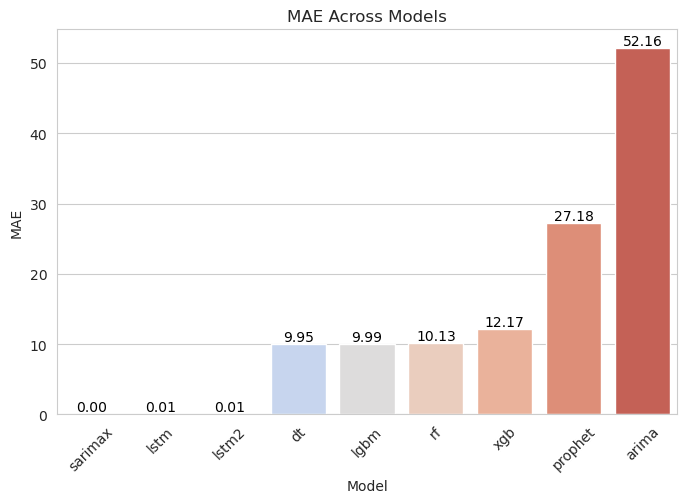

/tmp/ipykernel_49765/2517694825.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y=metric, data=df_sorted, palette="coolwarm")


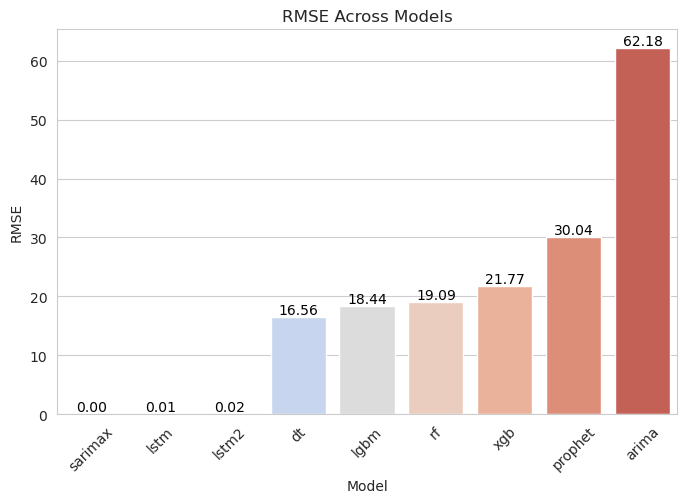

/tmp/ipykernel_49765/2517694825.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y=metric, data=df_sorted, palette="coolwarm")


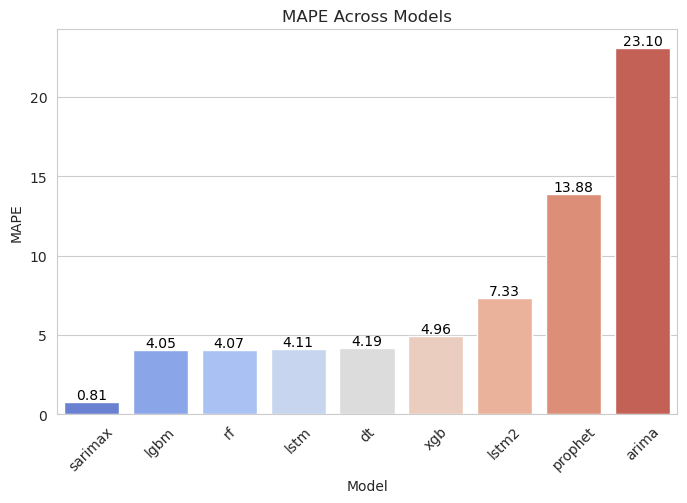

/tmp/ipykernel_49765/2517694825.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y=metric, data=df_sorted, palette="coolwarm")


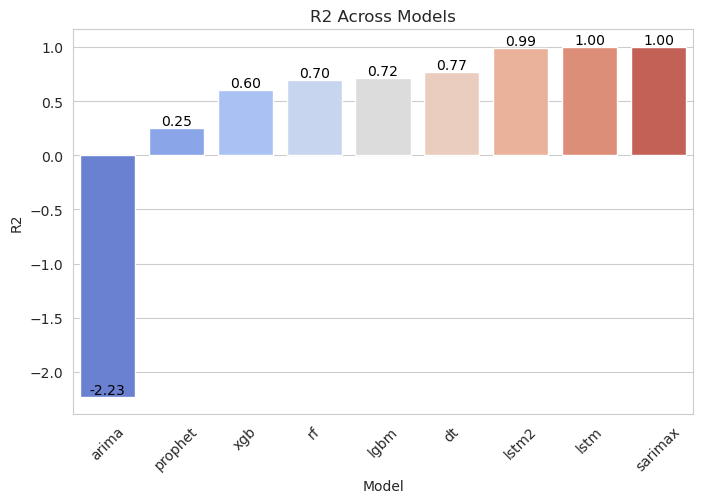

/tmp/ipykernel_49765/2517694825.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y=metric, data=df_sorted, palette="coolwarm")


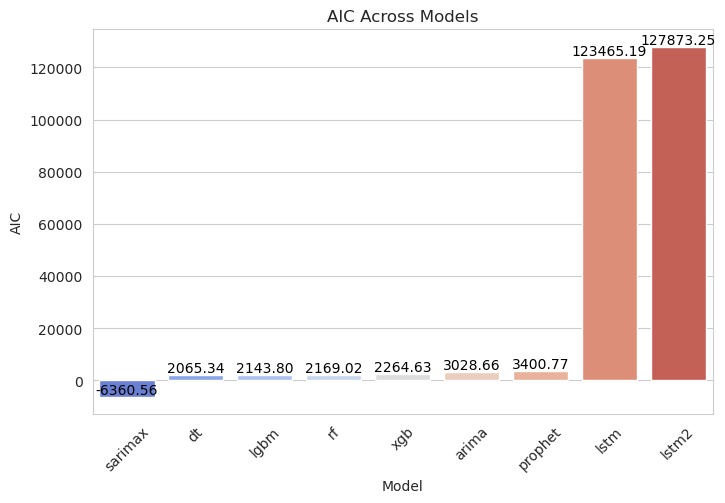

/tmp/ipykernel_49765/2517694825.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y=metric, data=df_sorted, palette="coolwarm")


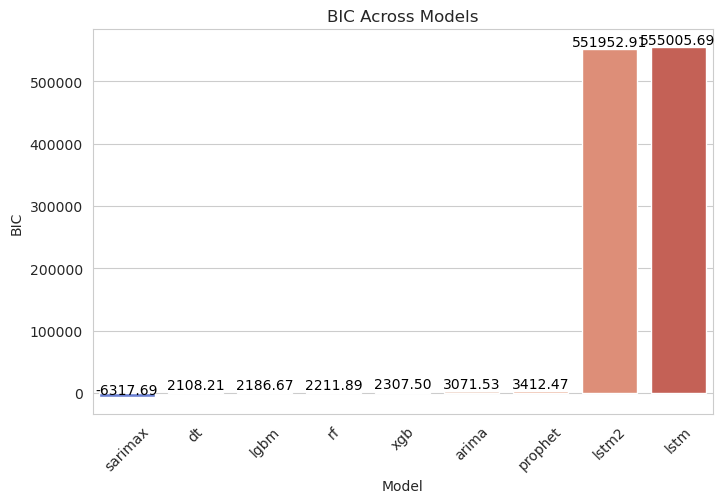

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define metrics
metrics = ["MAE", "RMSE", "MAPE", "R2", "AIC", "BIC"]

# Set style
sns.set_style("whitegrid")

# Loop through each metric and plot separately
for metric in metrics:
    plt.figure(figsize=(8, 5))
    
    # Sort values for better visualization
    df_sorted = df_results.sort_values(metric)
    
    # Bar plot
    ax = sns.barplot(x="Model", y=metric, data=df_sorted, palette="coolwarm")

    # Add text labels with two decimal points
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"{metric} Across Models")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    
    plt.show()


/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saswata/miniconda3/envs/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


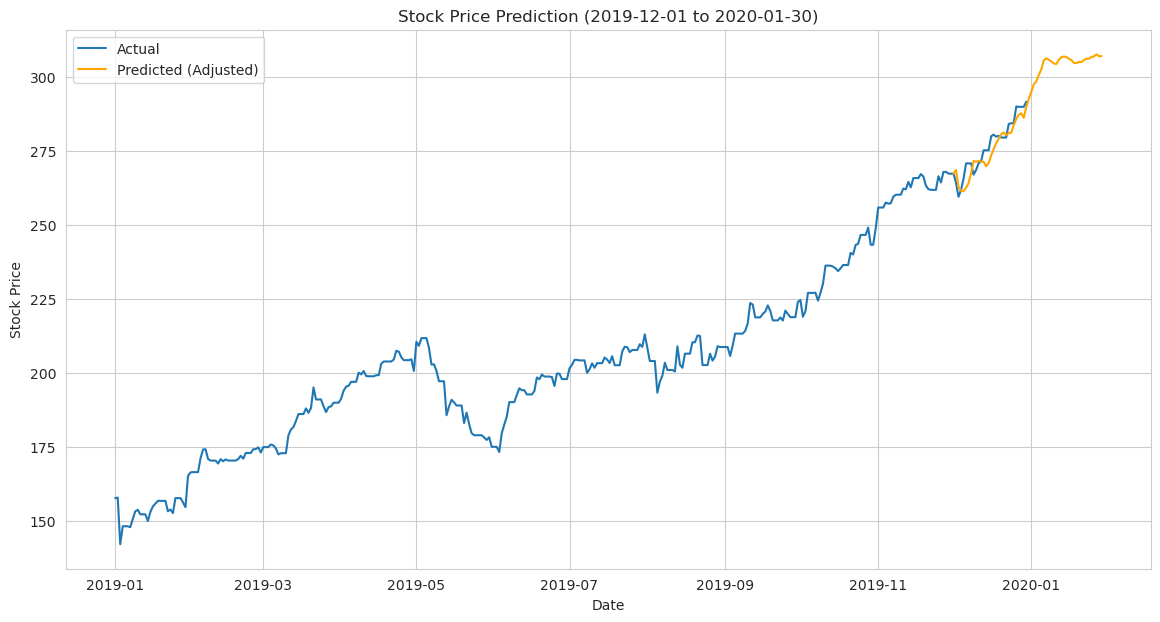

In [37]:
import pandas as pd
df=pd.read_excel("/home/saswata/data_science/project_2/filled_AAPL.xlsx")
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Features for dynamic trends
df['Yearly_Trend'] = df['Close'].rolling(window=365, min_periods=1).mean()
df['Monthly_Trend'] = df['Close'].rolling(window=30, min_periods=1).mean()
df['Weekly_Trend'] = df['Close'].rolling(window=7, min_periods=1).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']

df.dropna(inplace=True)
train_data = df.loc[:'2018-12-30']  # All data up to the end of 2018
test_data = df.loc['2019-01-01':]   # All data from the start of 2019
# Define Variables
train_endog = train_data['Close']
test_endog = test_data['Close']
exog_features = ['Yearly_Trend', 'Monthly_Trend', 'Weekly_Trend', 'MACD']

# Train SARIMAX Model with Adjusted Orders
model = SARIMAX(train_endog, exog=train_data[exog_features], order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
model_fit = model.fit(disp=False)

# Ensure the forecast covers from 2019-12-01 to 2020-01-30 (60 days)
forecast_steps = 60  # 60 days
forecast = model_fit.get_forecast(steps=forecast_steps, exog=test_data[exog_features].iloc[:forecast_steps])
forecast_values = forecast.predicted_mean

# Align the forecast with the last known actual data point
last_actual_close = df.loc['2019-11-30', 'Close']
first_forecast = forecast_values.iloc[0]
shift_value = last_actual_close - first_forecast
forecast_values_adjusted = forecast_values + shift_value

# Smooth transition: Align the first predicted value with the last actual value
forecast_values_adjusted.iloc[0] = last_actual_close

plt.figure(figsize=(14, 7))
plt.plot(test_data['Close'], label='Actual')  # Full actual data
plt.plot(pd.date_range('2019-12-01', periods=forecast_steps, freq='D'), forecast_values_adjusted, label='Predicted (Adjusted)', color='orange')
plt.title('Stock Price Prediction (2019-12-01 to 2020-01-30)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()